In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from collections import Counter
import string

In [24]:
df = pd.read_csv("/kaggle/input/fake-news-classification/WELFake_Dataset.csv")


In [25]:
df

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [26]:
df.head(5)

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [27]:
df.tail(5)

,Unnamed: 0,title,text,label
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0
72133,72133,Goldman Sachs Endorses Hillary Clinton For Pre...,Goldman Sachs Endorses Hillary Clinton For Pre...,1


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [29]:
df.describe()

,Unnamed: 0,label
count,72134.000000,72134.000000
mean,36066.500000,0.514404
std,20823.436496,0.499796
min,0.000000,0.000000
25%,18033.250000,0.000000
50%,36066.500000,1.000000
75%,54099.750000,1.000000
max,72133.000000,1.000000


In [30]:
df.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [31]:
df.isnull()

,Unnamed: 0,title,text,label
0,False,False,False,False
1,False,True,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
72129,False,False,False,False
72130,False,False,False,False
72131,False,False,False,False
72132,False,False,False,False


In [32]:
df.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [33]:
df.dropna(subset=['title', 'text', 'label'], inplace=True)

In [34]:
df

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


Text(0, 0.5, '')

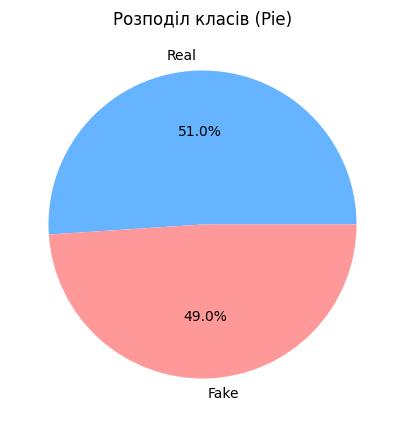

In [35]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
df['label'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Real', 'Fake'], colors=['#66b3ff','#ff9999'])
plt.title("Розподіл класів (Pie)"); plt.ylabel('')

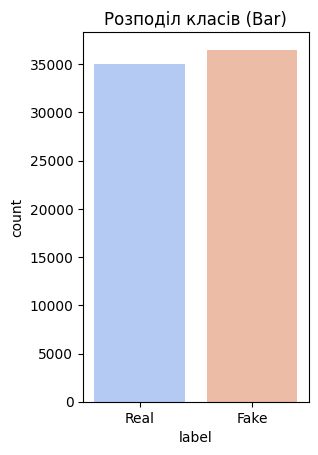

In [36]:
plt.subplot(1,2,2)
sns.countplot(x='label', data=df, palette='coolwarm')
plt.title("Розподіл класів (Bar)"); plt.xticks([0,1], ['Real', 'Fake'])
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

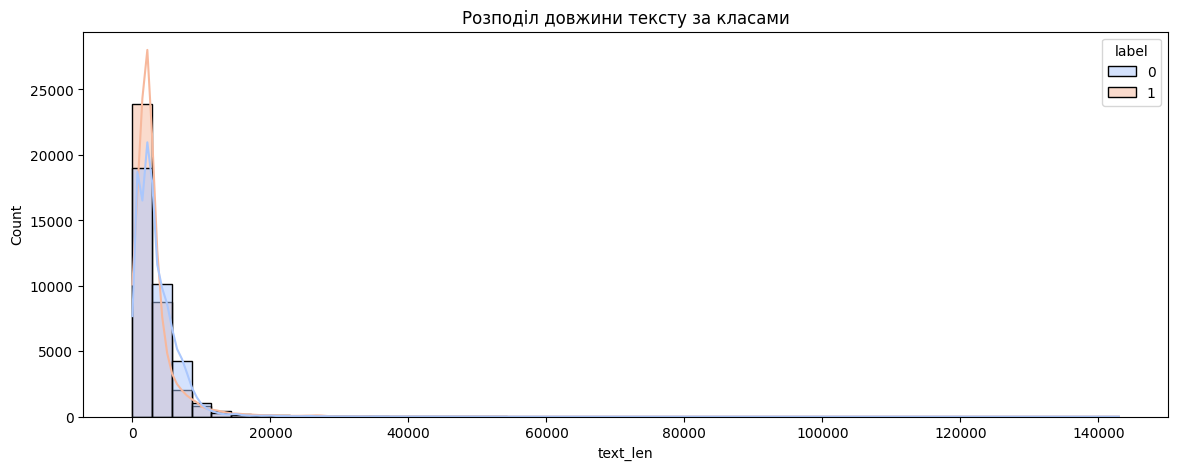

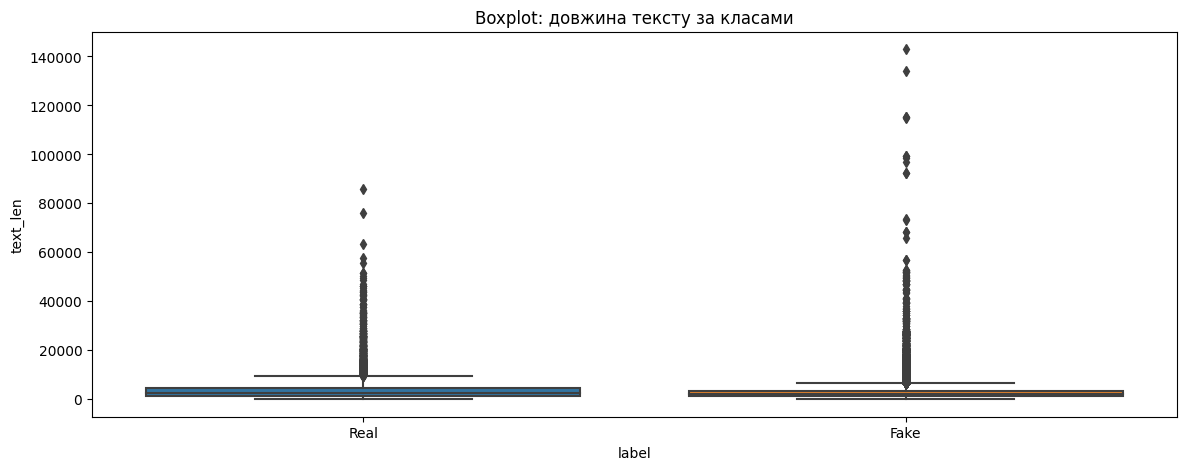

In [37]:
df['text_len'] = df['text'].apply(lambda x: len(str(x)))
df['title_len'] = df['title'].apply(lambda x: len(str(x)))

plt.figure(figsize=(14,5))
sns.histplot(data=df, x='text_len', hue='label', kde=True, bins=50, palette='coolwarm')
plt.title("Розподіл довжини тексту за класами")
plt.show()

plt.figure(figsize=(14,5))
sns.boxplot(x='label', y='text_len', data=df)
plt.title("Boxplot: довжина тексту за класами"); plt.xticks([0,1], ['Real', 'Fake'])
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

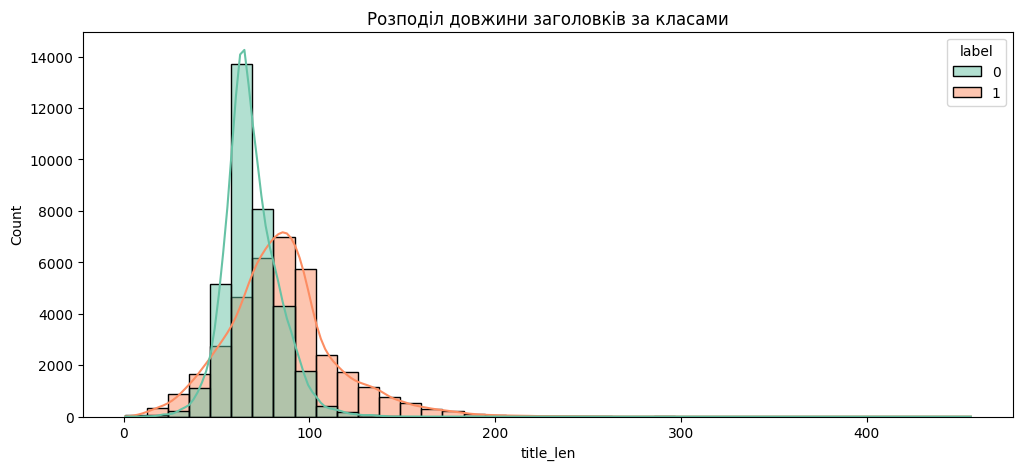

In [47]:
plt.figure(figsize=(12,5))
sns.histplot(data=df, x='title_len', hue='label', kde=True, bins=40, palette='Set2')
plt.title("Розподіл довжини заголовків за класами")
plt.show()

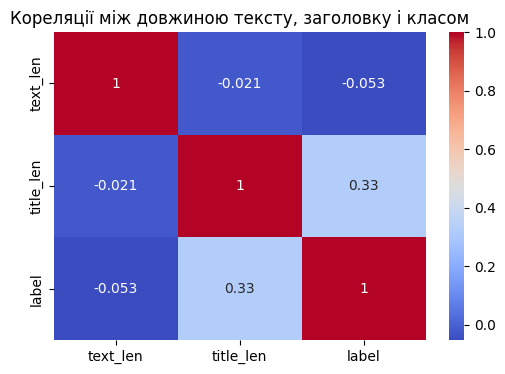

In [48]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['text_len', 'title_len', 'label']].corr(), annot=True, cmap='coolwarm')
plt.title("Кореляції між довжиною тексту, заголовку і класом")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

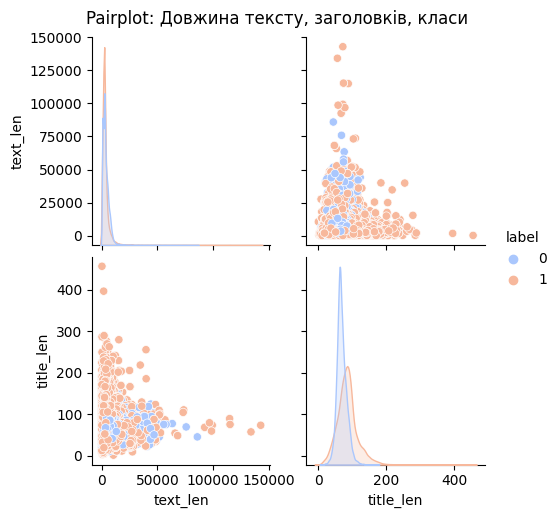

In [49]:
sns.pairplot(df[['text_len', 'title_len', 'label']], hue='label', palette='coolwarm')
plt.suptitle("Pairplot: Довжина тексту, заголовків, класи", y=1.02)
plt.show()

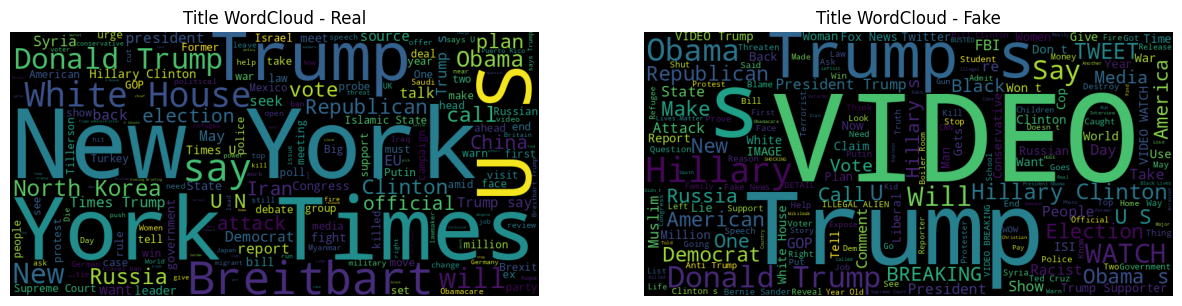

In [38]:
wc_title_real = WordCloud(width=800, height=400).generate(" ".join(df[df['label']==0]['title']))
wc_title_fake = WordCloud(width=800, height=400).generate(" ".join(df[df['label']==1]['title']))

plt.figure(figsize=(15,6))
plt.subplot(1,2,1); plt.imshow(wc_title_real); plt.axis('off'); plt.title("Title WordCloud - Real")
plt.subplot(1,2,2); plt.imshow(wc_title_fake); plt.axis('off'); plt.title("Title WordCloud - Fake")
plt.show()

In [39]:
def get_top_words(texts, n=15):
    words = " ".join(texts).lower().translate(str.maketrans('', '', string.punctuation)).split()
    return Counter(words).most_common(n)

In [40]:
top_real = get_top_words(df[df['label']==0]['text'].astype(str))
top_fake = get_top_words(df[df['label']==1]['text'].astype(str))

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


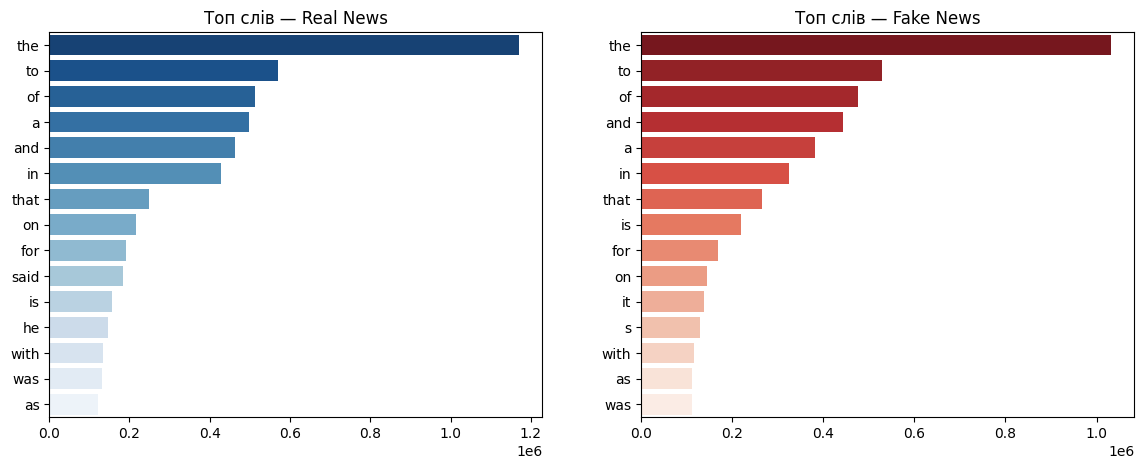

In [41]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.barplot(x=[x[1] for x in top_real], y=[x[0] for x in top_real], palette='Blues_r')
plt.title("Топ слів — Real News")

plt.subplot(1,2,2)
sns.barplot(x=[x[1] for x in top_fake], y=[x[0] for x in top_fake], palette='Reds_r')
plt.title("Топ слів — Fake News")
plt.show()

In [42]:
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X = tfidf.fit_transform(df['text'].astype(str))
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

NB Accuracy: 0.8452613922281241
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      7081
           1       0.83      0.87      0.85      7227

    accuracy                           0.85     14308
   macro avg       0.85      0.84      0.85     14308
weighted avg       0.85      0.85      0.85     14308

NB Accuracy (Test): 0.8452613922281241
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      7081
           1       0.83      0.87      0.85      7227

    accuracy                           0.85     14308
   macro avg       0.85      0.84      0.85     14308
weighted avg       0.85      0.85      0.85     14308



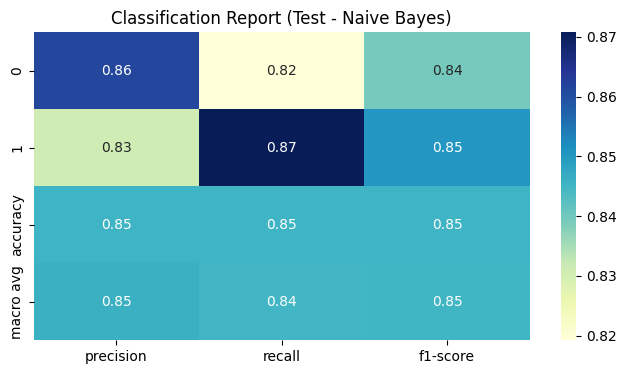

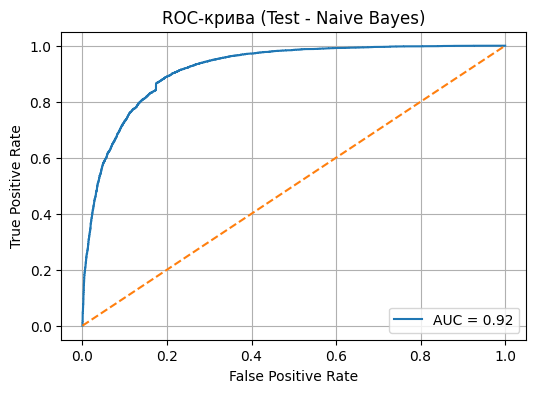

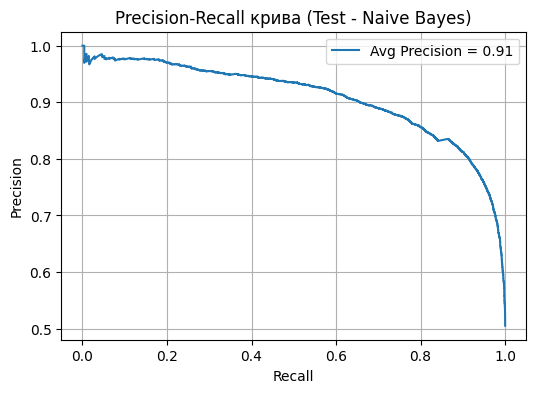

Classification Report (Train):
              precision    recall  f1-score   support

           0       0.86      0.82      0.84     27947
           1       0.83      0.87      0.85     29282

    accuracy                           0.85     57229
   macro avg       0.85      0.85      0.85     57229
weighted avg       0.85      0.85      0.85     57229



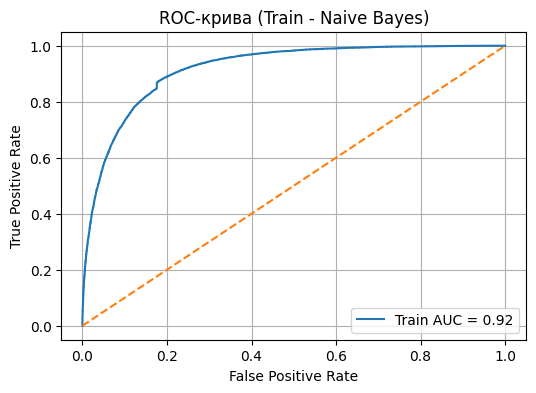

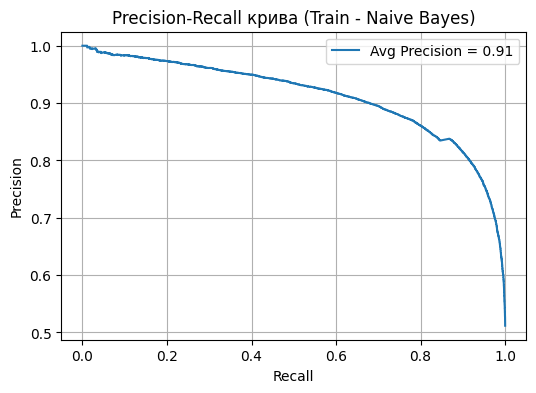

In [51]:
print("NB Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_curve, average_precision_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("NB Accuracy (Test):", accuracy_score(y_test, y_pred))
print("Classification Report (Test):")
print(classification_report(y_test, y_pred))

report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
plt.figure(figsize=(8,4))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap='YlGnBu')
plt.title("Classification Report (Test - Naive Bayes)")
plt.show()

y_probs = nb.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1], [0,1], linestyle='--')
plt.title("ROC-крива (Test - Naive Bayes)")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.legend(); plt.grid(True)
plt.show()

precision, recall, _ = precision_recall_curve(y_test, y_probs)
avg_precision = average_precision_score(y_test, y_probs)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'Avg Precision = {avg_precision:.2f}')
plt.title("Precision-Recall крива (Test - Naive Bayes)")
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.legend(); plt.grid(True)
plt.show()

y_train_probs = nb.predict_proba(X_train)[:,1]

print("Classification Report (Train):")
print(classification_report(y_train, nb.predict(X_train)))

fpr_train, tpr_train, _ = roc_curve(y_train, y_train_probs)
roc_auc_train = auc(fpr_train, tpr_train)

plt.figure(figsize=(6,4))
plt.plot(fpr_train, tpr_train, label=f'Train AUC = {roc_auc_train:.2f}')
plt.plot([0,1], [0,1], linestyle='--')
plt.title("ROC-крива (Train - Naive Bayes)")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.legend(); plt.grid(True)
plt.show()

precision_train, recall_train, _ = precision_recall_curve(y_train, y_train_probs)
avg_precision_train = average_precision_score(y_train, y_train_probs)

plt.figure(figsize=(6,4))
plt.plot(recall_train, precision_train, label=f'Avg Precision = {avg_precision_train:.2f}')
plt.title("Precision-Recall крива (Train - Naive Bayes)")
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.legend(); plt.grid(True)
plt.show()



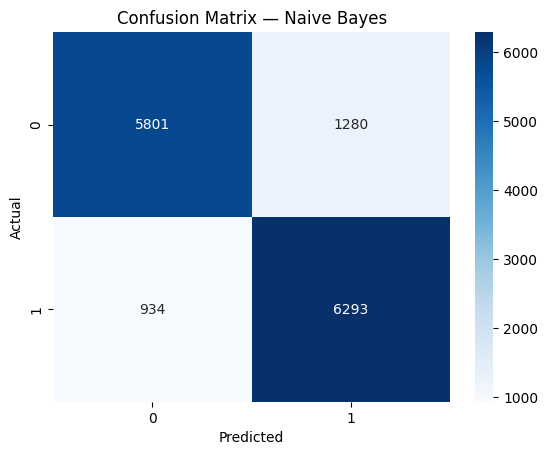

In [45]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix — Naive Bayes"); plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.show()

In [46]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("LogReg Accuracy:", accuracy_score(y_test, y_pred_lr))

LogReg Accuracy: 0.9373776908023483
